<a href="https://colab.research.google.com/github/cherryle1808/Machine-Learning1/blob/main/Lab03_(19_03).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIS710 Lab 3 Week 3**
Authors: Associate Professor Lemai Nguyen and Thuc Nguyen

Objective: to learn and practise linear regression models with scikit-learn


**To do before the class:**
1. complete Labs 0, 1 and 2
2. learn Lecture 3: Supervised Machine Learning: Linear Regression
3. download the housing.csv dataset and store it in your Google drive, Colab folder, MIS710 folder. This is for Task 1.

**Student name:**

Student ID:

# **Task 1: House Price Prediction**

Dataset: HousingPrice

Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

The dataset was modified to allow you deal with missing data.
**Download the modified data at the unit site.**

## **1.1 Import libraries**


In [ ]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns



## **1.2 Mount your Google drive**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## **1.3 Load and inspect data**


1.   Load the dataset
2.   Inspect the data
3.   Initial cleansing



In [ ]:
# load dataset
#records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Week 3/Housing3.csv")

url="https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%203/Housing3.csv"

records = pd.read_csv(url)

#Inspect the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1])

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0                no             yes        2      yes        furnished   

In [ ]:
##write your code to display info()
records.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              536 non-null    object
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          539 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  538 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 55.5+ KB


In [ ]:
#You can view a dataframe shape using the attribute shape
print("\n*** Dataset shape: ", records.shape)


*** Dataset shape:  (545, 13)


**Initial cleansing**

Note data quality issue: area should be numeric. Let's fix it.

In [ ]:
#area is wrongly documented as string, convert it to numeric
records['area'] = pd.to_numeric(records['area'], errors='coerce')

In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              535 non-null    float64
 1   bedrooms          545 non-null    int64  
 2   bathrooms         545 non-null    int64  
 3   stories           545 non-null    int64  
 4   mainroad          539 non-null    object 
 5   guestroom         545 non-null    object 
 6   basement          545 non-null    object 
 7   hotwaterheating   545 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    object 
 11  furnishingstatus  538 non-null    object 
 12  price             545 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


## **1.4 Inspect missing data**

The data preprocessing is cyclic with analysing and visualising data, handling missing data, and feature engineering. For the learning purpose, we show you some simple techniques, you should move between the activities yourself.

In [ ]:
#learn to use for loop, and accessing elements of a dataframe using iloc
#Count missing data
for i in records.iloc[:,0:]:
  miss=records[i].isna().sum()
  print(i,'missing: ', miss)

area missing:  10
bedrooms missing:  0
bathrooms missing:  0
stories missing:  0
mainroad missing:  6
guestroom missing:  0
basement missing:  0
hotwaterheating missing:  0
airconditioning missing:  0
parking missing:  0
prefarea missing:  0
furnishingstatus missing:  7
price missing:  0


In [ ]:
#another way to find missing data is using the function isnull()
#read about isnull() here https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
#read further at https://www.sharpsightlabs.com/blog/pandas-isnull/
print(records.isnull().sum().sort_values(ascending=0))

area                10
furnishingstatus     7
mainroad             6
bedrooms             0
bathrooms            0
stories              0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
price                0
dtype: int64


## **1.5 Conduct Exploratory Data Analysis (EDA)**

**Summarise and visualise data**
1.  Univariate analysis
2.  Bivariate analysis
3.  Multivariate analysis




### **1.5.1 Univariate analysis**
Explore and visualise each variable at a time


**Explore numeric variables**

In [ ]:
#overview of numeric data
records.describe()
#teacher recommends using describe before doing any anlysis

,area,bedrooms,bathrooms,stories,parking,price
count,535.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5144.560748,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2183.710148,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3577.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4510.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float', 'int']
records.describe(include=data_types)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
count,535.000,545.000,545.000,545.000,539,545,545,545,545,545.000,545,538,545.000
unique,NaN,NaN,NaN,NaN,2,2,3,2,3,NaN,3,4,NaN
top,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished,NaN
freq,NaN,NaN,NaN,NaN,464,448,354,520,372,NaN,416,222,NaN
mean,5144.561,2.965,1.286,1.806,NaN,NaN,NaN,NaN,NaN,0.694,NaN,NaN,4766729.248
std,2183.710,0.738,0.502,0.867,NaN,NaN,NaN,NaN,NaN,0.862,NaN,NaN,1870439.616
min,1650.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,1750000.000
25%,3577.000,2.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,3430000.000
50%,4510.000,3.000,1.000,2.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,4340000.000
75%,6360.000,3.000,2.000,2.000,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,5740000.000


In [ ]:
#describe a numeric variable
records['area'].describe()

,area
count,535.000
mean,5144.561
std,2183.710
min,1650.000
25%,3577.000
50%,4510.000
75%,6360.000
max,16200.000


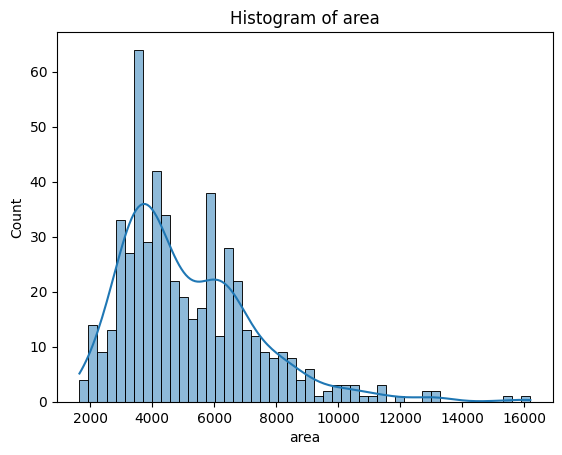

In [ ]:
#visualise its distribution
sns.histplot(data=records, x='area', kde=True, bins=50)
plt.title(f"Histogram of area")
plt.show()

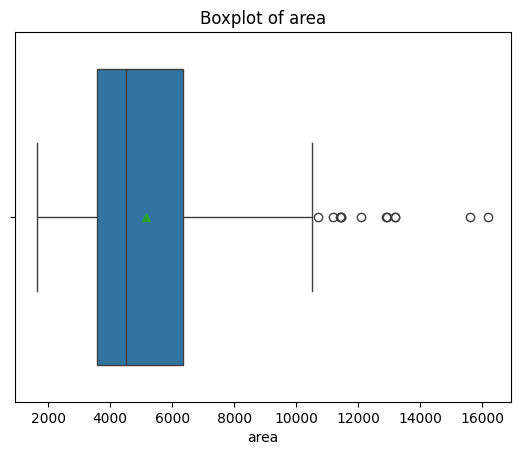

In [ ]:
sns.boxplot(data=records, x='area', showmeans=True)
plt.title(f"Boxplot of area")
plt.show()

There are missing data in the variables area; let's examine the distribution above.

Area is skewed. Let's replace the missing data with median in SECTION 1.5.2

In [ ]:
##write your code below to summarise the numeric variable price
records['price'].describe()

,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


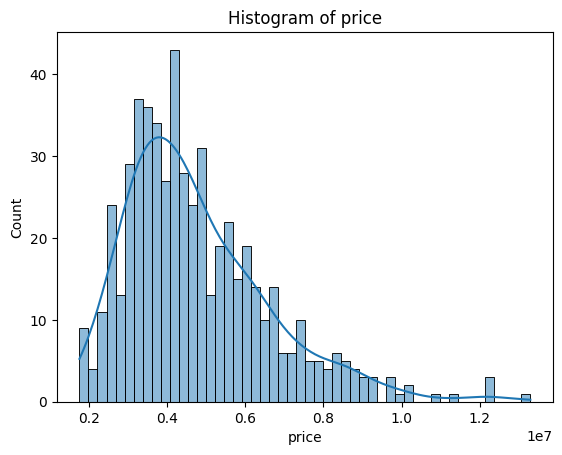

In [ ]:
##write your code below to generate a histogram of price

sns.histplot(data=records, x='price', kde=True, bins=50)
plt.title("Histogram of price")
plt.show()


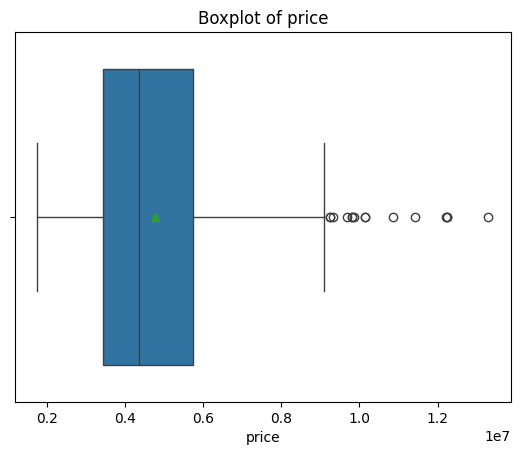

In [ ]:
##write your code below to generate a boxplot of price

sns.boxplot(data=records, x='price', showmeans=True)
plt.title(f"Boxplot of price")
plt.show()



**Visualise multiple numerical variables using a loop**

Numerical Variables: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


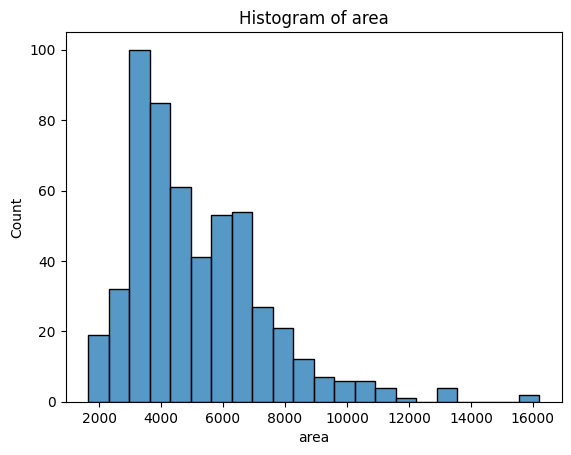

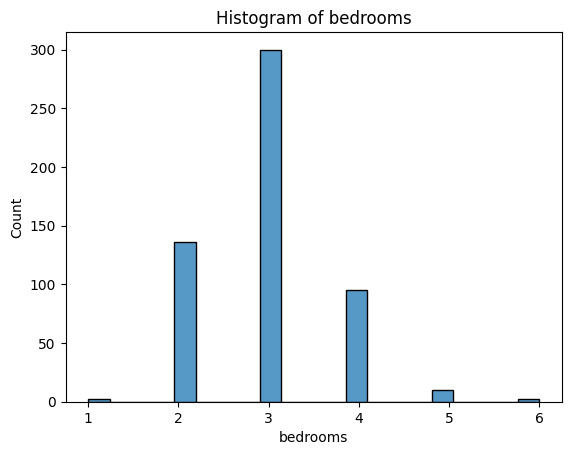

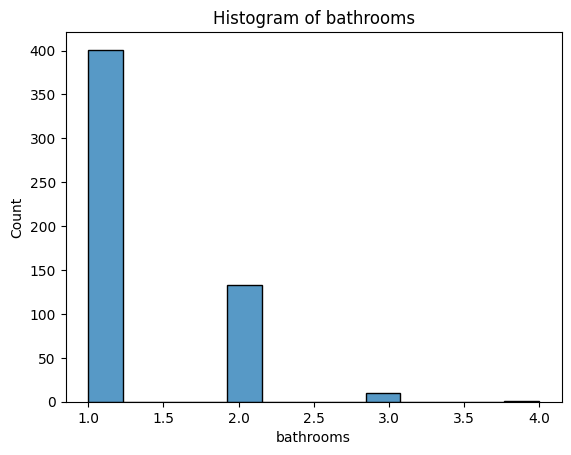

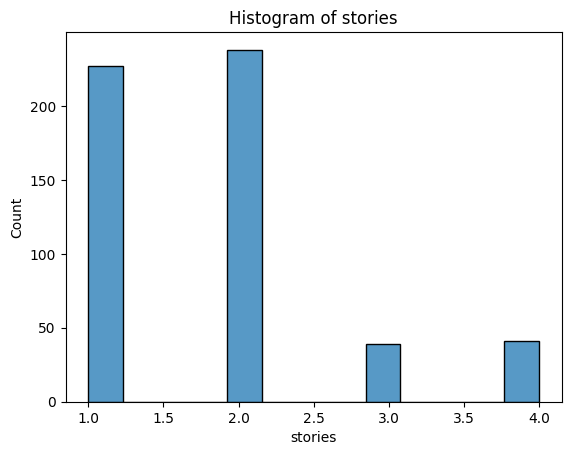

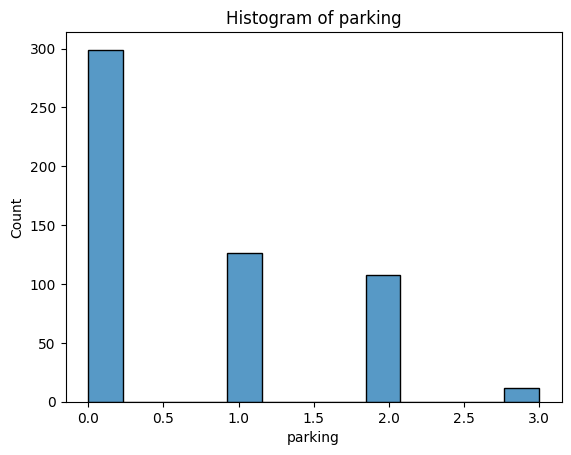

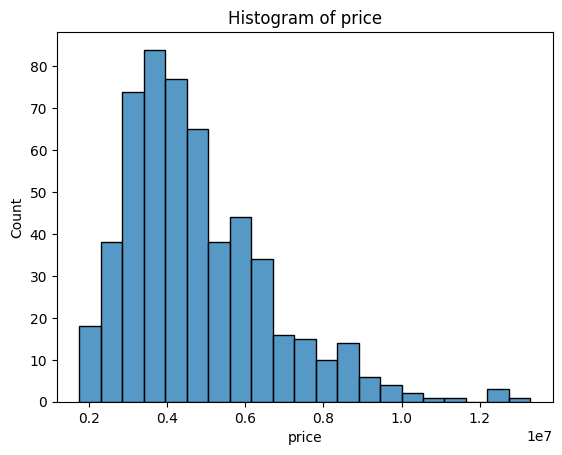

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Get the numerical variables from the dataset
numerical_variables = records.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Display histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=records, x=variable)
    plt.title(f"Histogram of {variable}")
    plt.show()



**Explore categorical variables**

In [ ]:
#explore each categorial variable
print(records['furnishingstatus'].value_counts())


furnishingstatus
semi-furnished    222
unfurnished       176
furnished         139
                    1
Name: count, dtype: int64


In [ ]:
#find mode
print('Furnishing Status mode: ', records['furnishingstatus'].mode())

Furnishing Status mode:  0    semi-furnished
Name: furnishingstatus, dtype: object


In [ ]:
#you can also use the built-in function mode to see the most frequently seen values of categorical data;
#it returns a series, so get the first index, there can be more than one mode

print(records['furnishingstatus'].mode()[0])

semi-furnished


<Axes: xlabel='furnishingstatus', ylabel='count'>

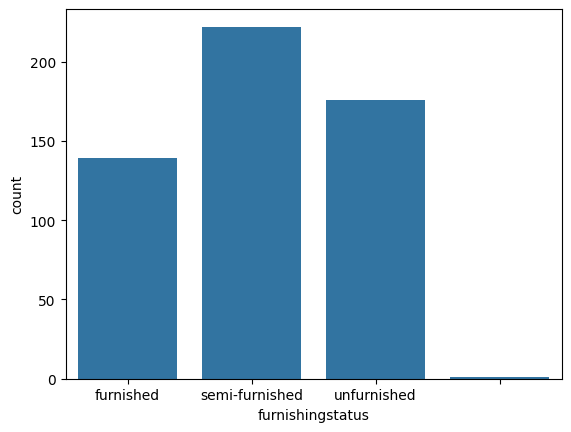

In [ ]:
#summarise a categorical variable using a barchart (countplot)
sns.countplot(data=records, x='furnishingstatus')

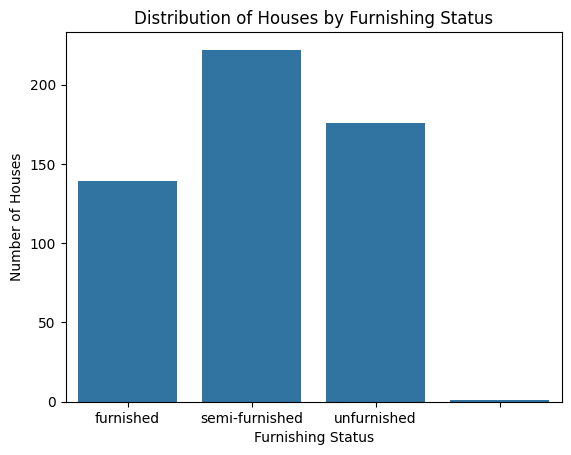

In [ ]:
#you can add labels
sns.countplot(x=records['furnishingstatus'])
plt.xlabel('Furnishing Status')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Furnishing Status')
plt.show()

Mode is semi-furnished; Note the 'weird' category " " (a space). We have a data quality issue.  We need to cleanse this in SECTION 1.5.2

In [ ]:
##write your code to print frequency of houses on mainroad and not on mainroad
print(records['mainroad'].value_counts())

mainroad
yes    464
no      75
Name: count, dtype: int64


In [ ]:
##write your code to print mode of mainroad
print(records['mainroad'].mode()[0])


yes


<Axes: xlabel='mainroad', ylabel='count'>

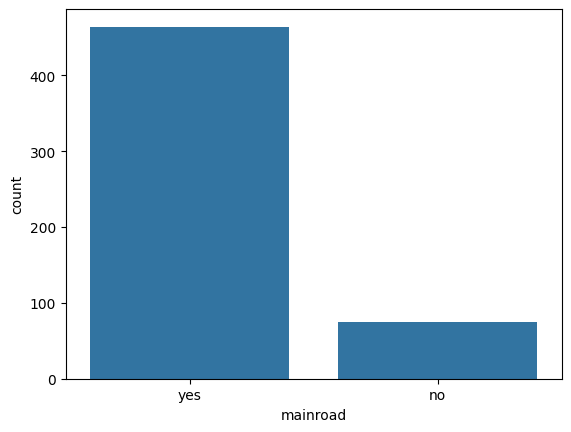

In [ ]:
##write your code to generate a countplot for another categorical variable, such as mainroad
sns.countplot(data=records, x='mainroad')

In [ ]:
##write your code to explore another categorial variable, such as bathrooms
print(records['bathrooms'].value_counts())

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


In [ ]:
#find mode
print('Most frequent number of bathrooms: ', records['bathrooms'].mode())

Most frequent number of bathrooms:  0    1
Name: bathrooms, dtype: int64


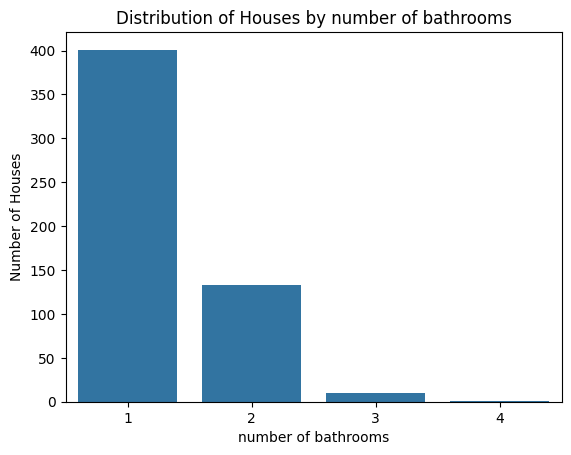

In [ ]:
##write your code to visualise the barchart (countplot) of bathrooms


sns.countplot(data=records, x='bathrooms')
plt.xlabel('number of bathrooms')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by number of bathrooms')
plt.show()


**Visualise multiple categorical variables**

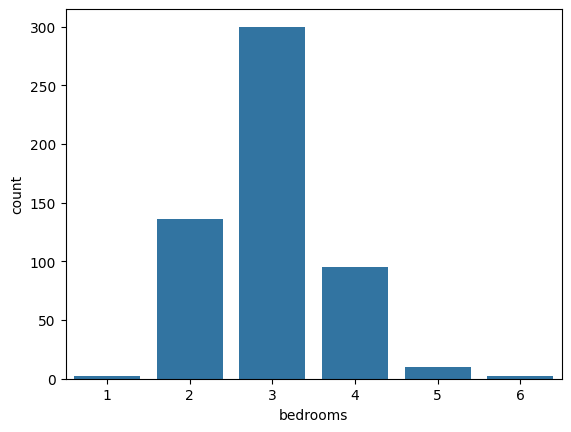

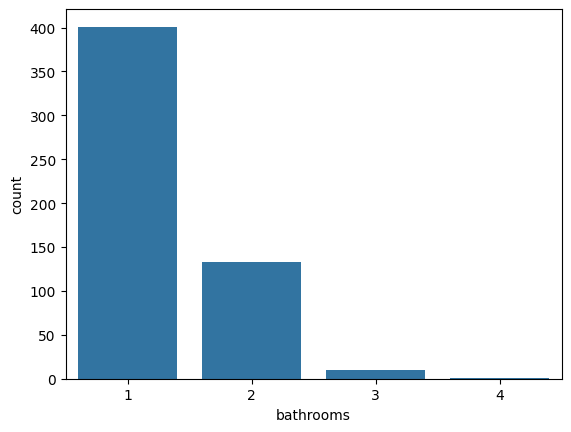

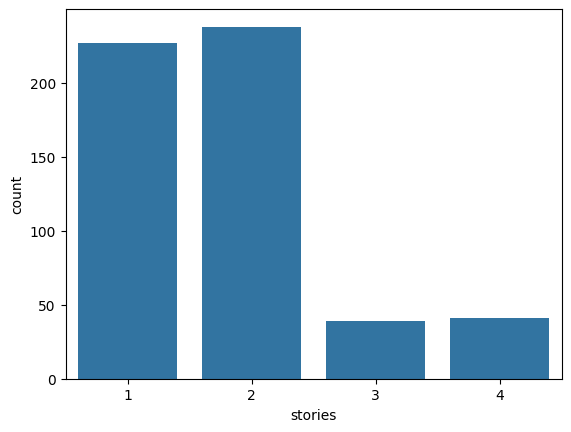

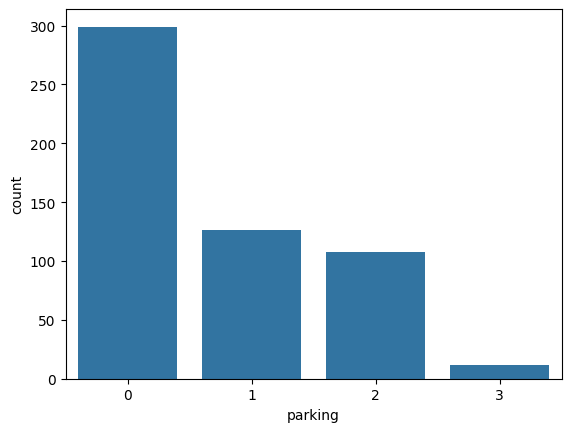

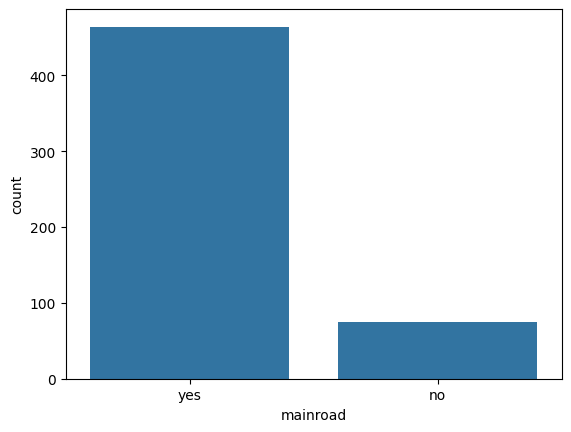

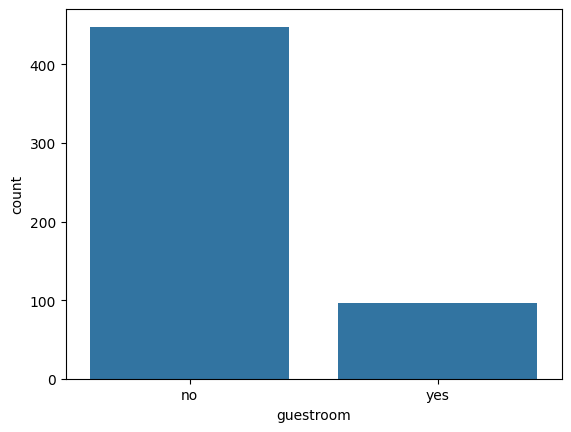

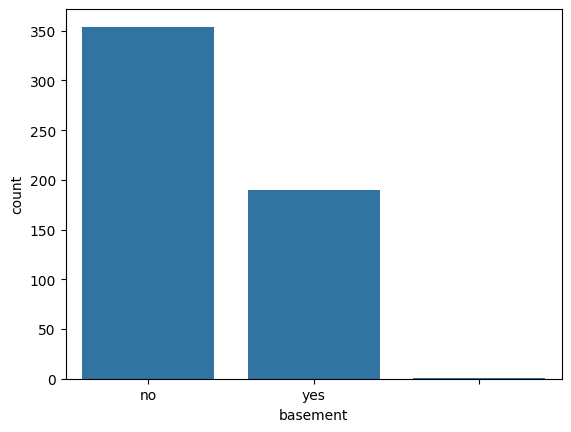

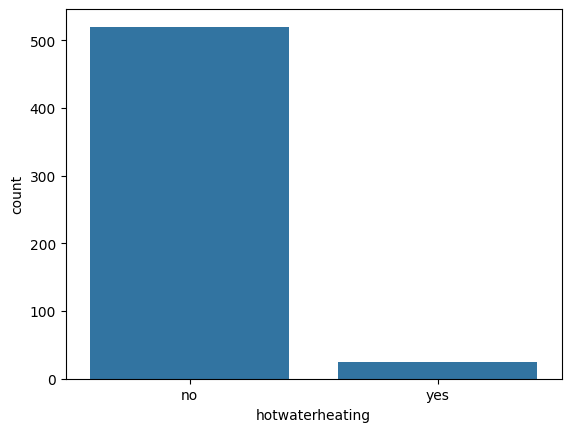

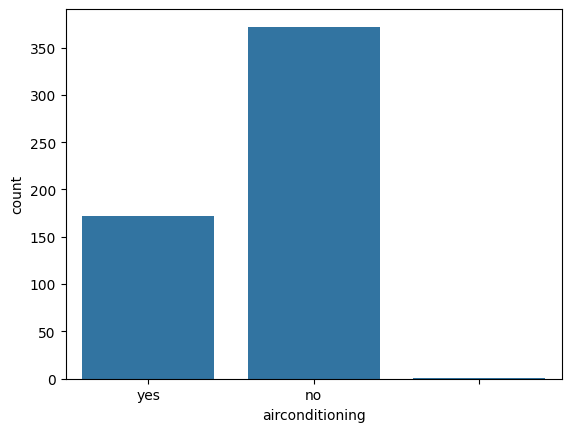

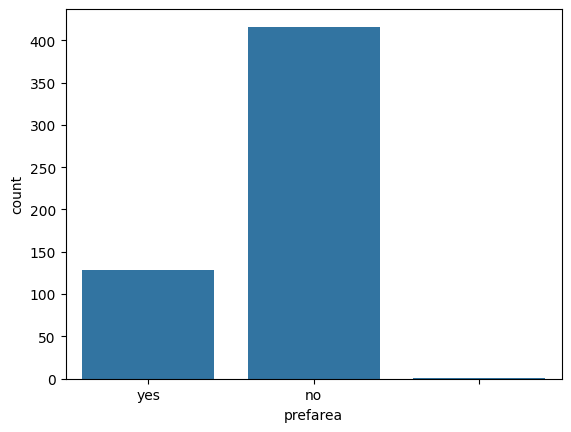

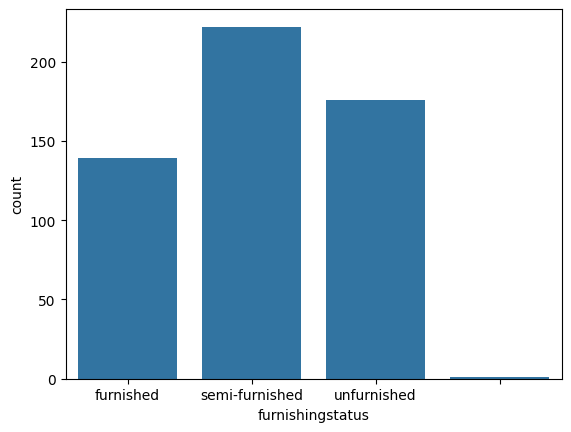

In [ ]:
cat_variables = ['bedrooms', 'bathrooms','stories', 'parking','mainroad','guestroom','basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for i in cat_variables:
   plt.figure()
   sns.countplot(x=records[i])


Note spaces are included in some catagorical variables. They should be treated as missing data.

### **1.5.2 Treat missing data**

In [ ]:
# Replace empty strings (" ") with NaN
records.replace(" ", pd.NA, inplace=True)

In [ ]:
print(records.isnull().sum().sort_values(ascending=0))

area                10
furnishingstatus     8
mainroad             6
basement             1
airconditioning      1
prefarea             1
bedrooms             0
bathrooms            0
stories              0
guestroom            0
hotwaterheating      0
parking              0
price                0
dtype: int64


In [ ]:
# prompt: replace missing basement, airconditioning, and prefarea  with mode

records['basement'] = records['basement'].fillna(records['basement'].mode()[0])
records['airconditioning'] = records['airconditioning'].fillna(records['airconditioning'].mode()[0])
records['prefarea'] = records['prefarea'].fillna(records['prefarea'].mode()[0])


In [ ]:
print(records.isnull().sum().sort_values(ascending=0))

area                10
furnishingstatus     7
mainroad             6
bathrooms            0
bedrooms             0
stories              0
guestroom            0
hotwaterheating      0
basement             0
airconditioning      0
parking              0
prefarea             0
price                0
dtype: int64


 rerun the analyses above with the cleansed dataset

### **1.5.3 Bivariate and Multivariate visualisation**

Categorical vs Categorical: use contigency table/ countplot

**Display a countplot for one categorical variable grouped by a second categorical variable**
https://seaborn.pydata.org/generated/seaborn.countplot.html

In [ ]:
# display contingency table between mainroad and prearea

import pandas as pd
pd.crosstab(records['mainroad'], records['prefarea'])


prefarea,no,yes
mainroad,,
no,73,2
yes,344,126


Discuss the contingency table

<Axes: xlabel='prefarea', ylabel='count'>

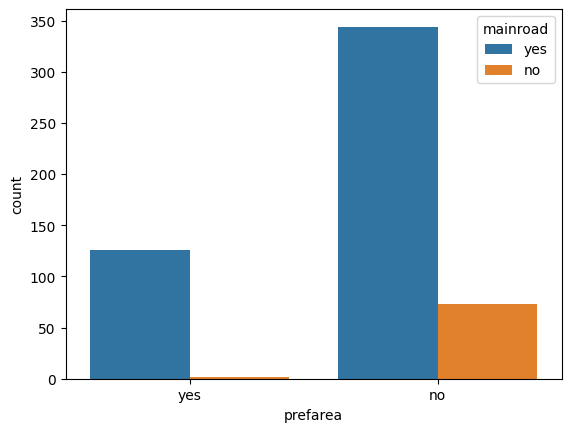

In [ ]:
#frequency of houses in prefarea and not in prearea by mainroad
sns.countplot(data=records, x='prefarea', hue='mainroad')

In [ ]:
## write your code to display contingency table between mainroad and furnishing status
pd.crosstab(records['mainroad'], records['furnishingstatus'])


furnishingstatus,furnished,semi-furnished,unfurnished
mainroad,,,
no,9,28,37
yes,129,191,138


Discuss the contingency table

<Axes: xlabel='furnishingstatus', ylabel='count'>

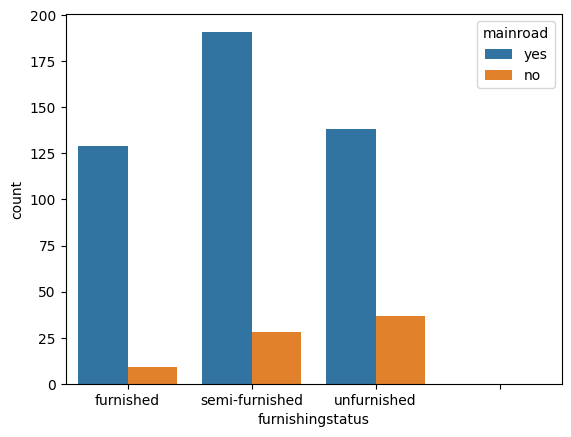

In [ ]:
##write your code examine relationships between other categorical variables, eg furnishingstatus vs mainroad
sns.countplot(data=records, x='furnishingstatus', hue='mainroad')

**Compare distributions of numerical variables using boxplots**
https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='price', ylabel='furnishingstatus'>

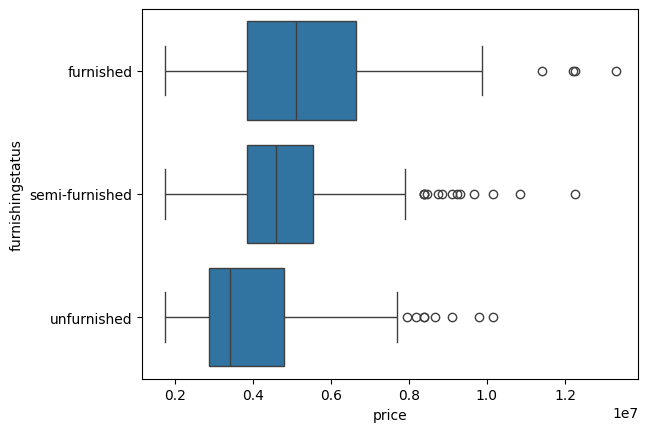

In [ ]:
sns.boxplot(data=records, x='price', y='furnishingstatus')

<Axes: xlabel='price', ylabel='prefarea'>

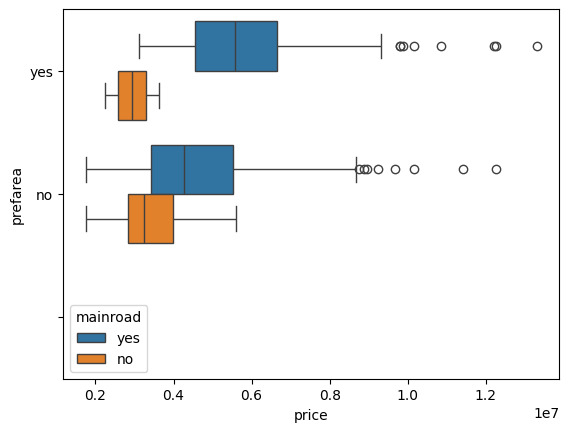

In [ ]:
##write your code to examine boxplots of price by prefarea and mainroad, hint: using x=  y= and hue=
sns.boxplot(data=records, x='price', y='prefarea', hue='mainroad')

**Ploting diagram to see relationships between two numerical variables**
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='area', ylabel='price'>

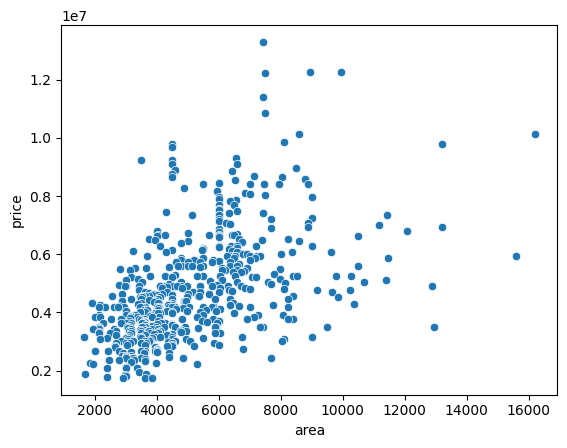

In [ ]:
sns.scatterplot(data=records, x='area', y='price')

Multivariate

In [ ]:
#convert categorical into numerical (MUST DO)



In [ ]:
#define my own array of numeric variables of interest
numerical_variables  = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

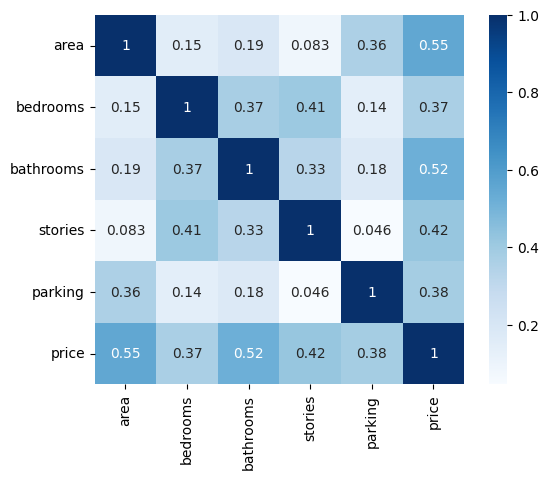

In [ ]:
#generate heatmaps to explore relationships
sns.heatmap(records[numerical_variables].corr(), square=True, cmap='Blues', annot=True)
plt.show()

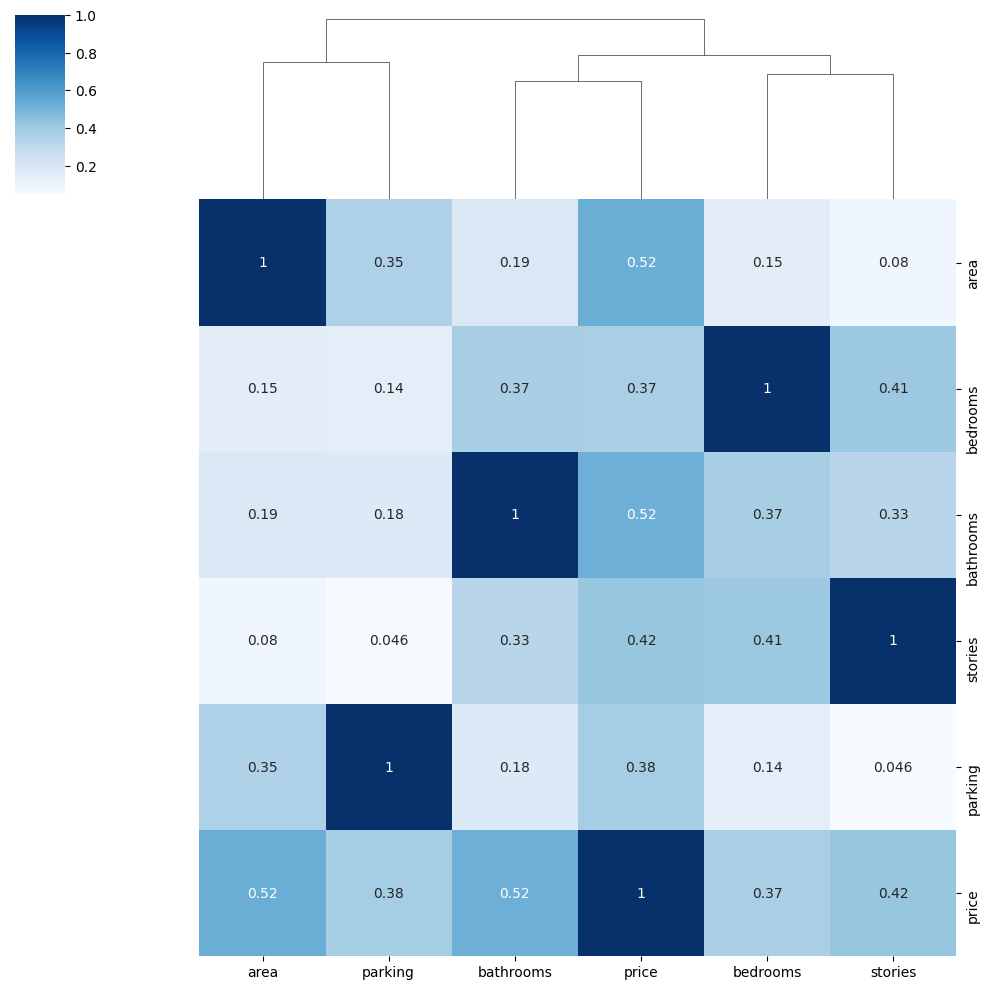

In [ ]:
#generate dendrograms to show hierarchical clustering
sns.clustermap(records[numerical_variables].corr(), cmap='Blues', annot=True, row_cluster=False)
plt.show()

## **1.7 Encoding data**

In [ ]:
#OPTIONAL: If you want to do optional exercises to explore different ways to convert data, then store our datasets for these explorations later
records1=records
records2=records

In [ ]:
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              535 non-null    float64
 1   bedrooms          545 non-null    int64  
 2   bathrooms         545 non-null    int64  
 3   stories           545 non-null    int64  
 4   mainroad          539 non-null    object 
 5   guestroom         545 non-null    object 
 6   basement          545 non-null    object 
 7   hotwaterheating   545 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    object 
 11  furnishingstatus  538 non-null    object 
 12  price             545 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB
None


In [ ]:
furnishing_mapping = {
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
}

# Replace empty strings (" ") with NaN before mapping
records['furnishingstatus'] = records['furnishingstatus'].replace(" ", pd.NA)

# Apply the mapping and create a new numerical column
records['furnishingstatus_N'] = records['furnishingstatus'].replace(furnishing_mapping).fillna(-1).astype(int)

In [ ]:
other_cat_variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Convert categorical variables into numeric using dummy encoding
records = pd.get_dummies(records, columns=other_cat_variables, drop_first=True)

In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                535 non-null    float64
 1   bedrooms            545 non-null    int64  
 2   bathrooms           545 non-null    int64  
 3   stories             545 non-null    int64  
 4   mainroad            539 non-null    object 
 5   guestroom           545 non-null    object 
 6   basement            545 non-null    object 
 7   hotwaterheating     545 non-null    object 
 8   airconditioning     545 non-null    object 
 9   parking             545 non-null    int64  
 10  prefarea            545 non-null    object 
 11  furnishingstatus    537 non-null    object 
 12  price               545 non-null    int64  
 13  furnishingstatus_N  545 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 59.7+ KB


In [ ]:
records.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnishingstatus_N
0,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000,2
1,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000,2
2,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000,1
3,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000,2
4,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000,2


In [ ]:
numerical_variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'furnishingstatus_N']  # Add furnishingstatus_N


<Axes: >

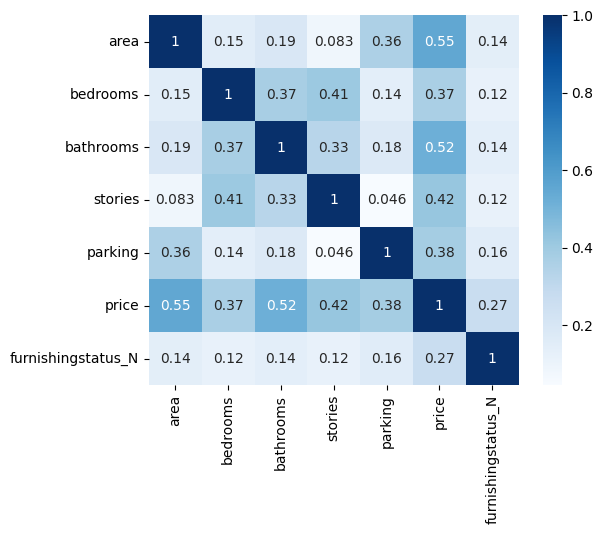

In [ ]:
sns.heatmap(records[numerical_variables].corr(), square=True, cmap='Blues', annot=True)


### **Optional exercises**

**Option 2 to encode data**
Do this with the copy records1


In [ ]:
#Last week, we learned to convert categorical variables to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
records1['mainroad_N'] = encoder.fit_transform(records1['mainroad'])
records1['basement_N'] = encoder.fit_transform(records1['basement'])


In [ ]:
#there are other ways of doing this, for example
records1['hotwaterheating_N'] = records1['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)

records1.sample(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnishingstatus_N,mainroad_N,basement_N,hotwaterheating_N
153,3300.0,3,3,2,yes,no,yes,no,no,0,no,semi-furnished,5530000,1,1,2,0
225,6440.0,2,1,1,yes,no,no,no,yes,3,no,semi-furnished,4753000,1,1,1,0
203,5400.0,4,1,2,yes,no,no,no,no,0,no,semi-furnished,4900000,1,1,1,0
211,12900.0,3,1,1,yes,no,no,no,no,2,no,NaN,4900000,-1,1,1,0
349,4820.0,3,1,2,yes,no,no,no,no,0,no,semi-furnished,3780000,1,1,1,0
50,7440.0,3,2,4,yes,no,no,no,no,1,yes,unfurnished,7420000,0,1,1,0
251,3450.0,3,1,2,yes,no,yes,no,no,1,no,semi-furnished,4515000,1,1,2,0
524,3264.0,2,1,1,yes,no,no,no,no,0,no,unfurnished,2380000,0,1,1,0
398,3120.0,3,1,2,yes,no,no,no,no,1,no,unfurnished,3500000,0,1,1,0
287,5500.0,3,1,2,yes,no,no,no,yes,0,no,unfurnished,4200000,0,1,1,0


In [ ]:
#another way, defining your OWN function
#convert categorical data to numerical
def coding_furnishingstatus(x):
        if pd.isna(x):  # Check for pd.NA first
            return np.nan  # or any desired value for missing data
        if x=='furnished': return 3
        if x=='semi-furnished': return 2
        if x=='unfurnished': return 1

records1['furnishingstatus_N2'] = records1['furnishingstatus'].apply(coding_furnishingstatus)

records1.iloc[9:14]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnishingstatus_N,mainroad_N,basement_N,hotwaterheating_N,furnishingstatus_N2
9,NaN,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,9800000,0,1,1,0,1.0
10,13200.0,3,1,2,yes,no,yes,no,yes,2,yes,furnished,9800000,2,1,2,0,3.0
11,NaN,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished,9681000,1,1,2,1,2.0
12,6550.0,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished,9310000,1,1,1,0,2.0
13,3500.0,4,2,2,yes,no,no,yes,no,2,no,furnished,9240000,2,1,1,1,3.0


In [ ]:
#write code to drop redudant columns if you don't like this option



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                545 non-null    float64
 1   bedrooms            545 non-null    int64  
 2   bathrooms           545 non-null    int64  
 3   stories             545 non-null    int64  
 4   mainroad            545 non-null    object 
 5   guestroom           545 non-null    object 
 6   basement            545 non-null    object 
 7   hotwaterheating     545 non-null    object 
 8   airconditioning     545 non-null    object 
 9   parking             545 non-null    int64  
 10  prefarea            545 non-null    object 
 11  furnishingstatus    545 non-null    object 
 12  price               545 non-null    int64  
 13  furnishingstatus_N  545 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 59.7+ KB
None


Option 3 to convert data types**
Do this on the copy records2

In [ ]:
#Another way is getting all catagorical columns
cat_variables = records2.select_dtypes(include=['object']).columns
#Convert categorical columns to numeric
records2[cat_variables] = records2[cat_variables].apply(encoder.fit_transform)

# Display the updated dataset
records2.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnishingstatus_N,mainroad_N,basement_N,hotwaterheating_N,furnishingstatus_N2
0,7420.000,4,2,3,1,0,0,0,1,2,1,0,13300000,2,1,0,0,3
1,8960.000,4,4,4,1,0,0,0,1,3,0,0,12250000,2,1,0,0,3
2,9960.000,3,2,2,1,0,1,0,0,2,1,1,12250000,1,1,1,0,2
3,7500.000,4,2,2,1,0,1,0,1,3,1,0,12215000,2,1,1,0,3
4,7420.000,4,1,2,1,1,1,0,1,2,0,0,11410000,2,1,1,0,3


**Moving columns and accessing rows**

In [ ]:
#Let't move price to the first column
first_column=records.pop('price')
records.insert(0,'price',first_column)

In [ ]:
records

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,furnishingstatus_N,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420.000,4,2,3,2,furnished,2,True,False,False,False,True,True
1,12250000,8960.000,4,4,4,3,furnished,2,True,False,False,False,True,False
2,12250000,9960.000,3,2,2,2,semi-furnished,1,True,False,True,False,False,True
3,12215000,7500.000,4,2,2,3,furnished,2,True,False,True,False,True,True
4,11410000,7420.000,4,1,2,2,furnished,2,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000.000,2,1,1,2,unfurnished,0,True,False,True,False,False,False
541,1767150,2400.000,3,1,1,0,semi-furnished,1,False,False,False,False,False,False
542,1750000,3620.000,2,1,1,0,unfurnished,0,True,False,False,False,False,False
543,1750000,2910.000,3,1,1,0,furnished,2,False,False,False,False,False,False


In [ ]:
records.iloc[9:14]

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,furnishingstatus_N,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
9,9800000,4510.000,3,2,4,1,unfurnished,0,True,True,False,False,True,True
10,9800000,13200.000,3,1,2,2,furnished,2,True,False,True,False,True,True
11,9681000,4510.000,4,3,2,2,semi-furnished,1,True,True,True,True,False,False
12,9310000,6550.000,4,2,2,1,semi-furnished,1,True,False,False,False,True,True
13,9240000,3500.000,4,2,2,2,furnished,2,True,False,False,True,False,False


## **1.8 Select features and target**

In [ ]:
#feature selection
features=['area']
X=records[features]
X.head()

,area
0,7420.000
1,8960.000
2,9960.000
3,7500.000
4,7420.000


In [ ]:
#specify the label
y=records['price']
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


## **1.9 Split the dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


        area
187 6100.000
273 3500.000
316 5900.000
320 4320.000
231 4320.000
187    5110000
273    4340000
316    4060000
320    4060000
231    4690000
Name: price, dtype: int64
Training dataset size: (436, 1)
Test dataset size: (109, 1)


# **HOMEWORK Task 2: Insurance cost estimation**

**Do it yourself:** Repeat the above steps with the insurance dataset to consilidate your learning

## **2.1 Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

## **2.2 Load dataset**

In [ ]:
# Load data using pandas.read_csv(filepath_or_url, sep=',')
url = "https://raw.githubusercontent.com/ABAL-DU/MIS710-Resources/main/Week%203/insurance.csv"

df = pd.read_csv(url)


## **2.3 EDA**

* How many rows and columns in the dataset?
* Return the first n rows.
* What are the columns and their datatypes?
* Is there any missing values?
* How to deal with categorical features?
* Any strong correlation from the dataset?  
* What are the stats for the `charges`? Plot overall distribution of `charges`; and ditribution of chareges for smoker and non-smokers. Practice more with `bmi`, `age` and `sex` variables.



In [ ]:
# How many rows and columns in the dataset?
df

# Return the first n rows.
df.head()

# What are the columns and their datatypes?
df.info()

# Is there any missing values?
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


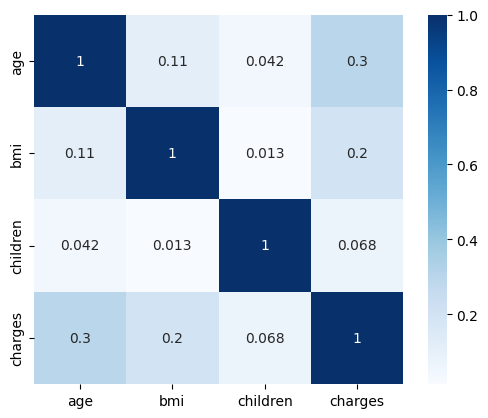

In [ ]:
# Correlation plot
sns.heatmap(df[['age','bmi','children','charges']].corr(), square=True, cmap='Blues', annot=True)
plt.show()

In [ ]:
# How to deal with categorical features?

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)


In [ ]:
'''
What are the stats for the charges? Plot overall distribution of charges;
and ditribution of chareges for smoker and non-smokers.
'''
df.charges.describe()

,charges
count,1338.000
mean,13270.422
std,12110.011
min,1121.874
25%,4740.287
50%,9382.033
75%,16639.913
max,63770.428


<Axes: >

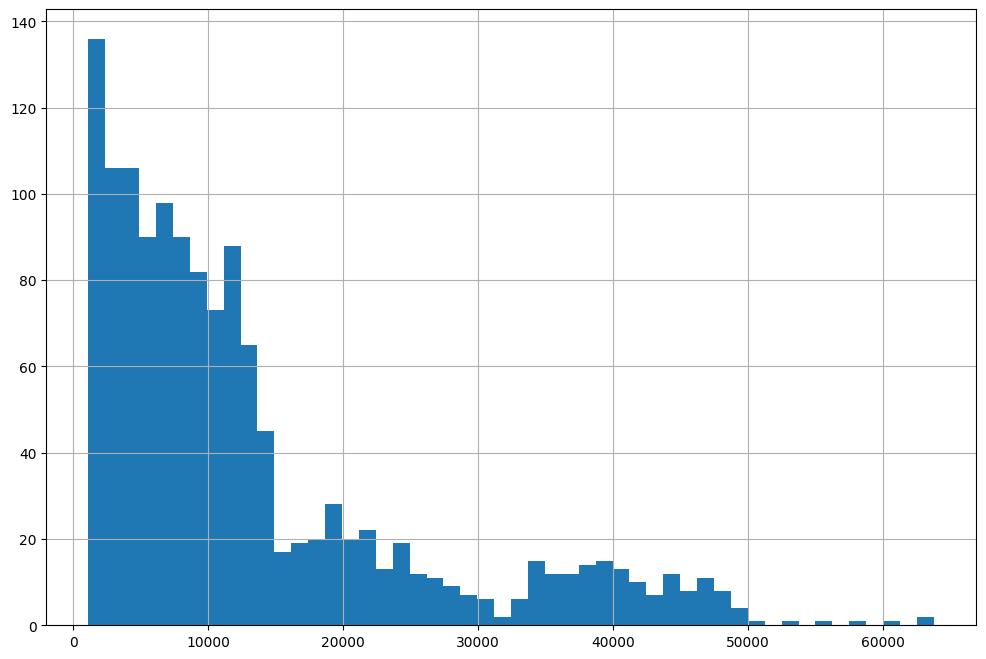

In [ ]:
df.charges.hist(bins=50, figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

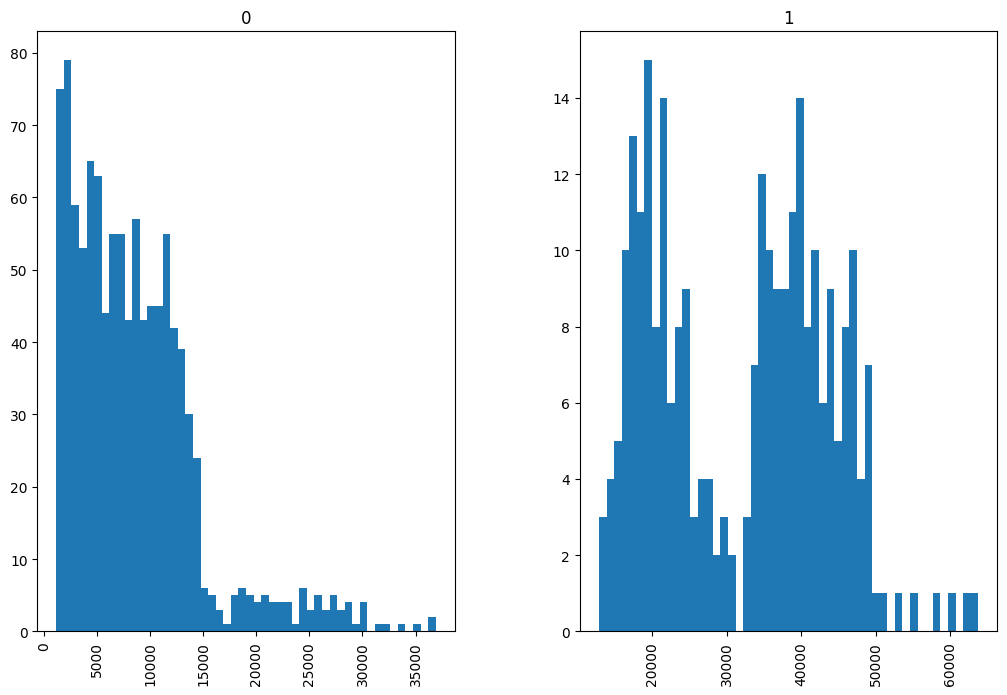

In [ ]:
df.charges.hist(by=df.smoker, bins=50, figsize=(12,8))

<ipython-input-70-c051c0ca3e97>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
<ipython-input-70-c051c0ca3e97>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

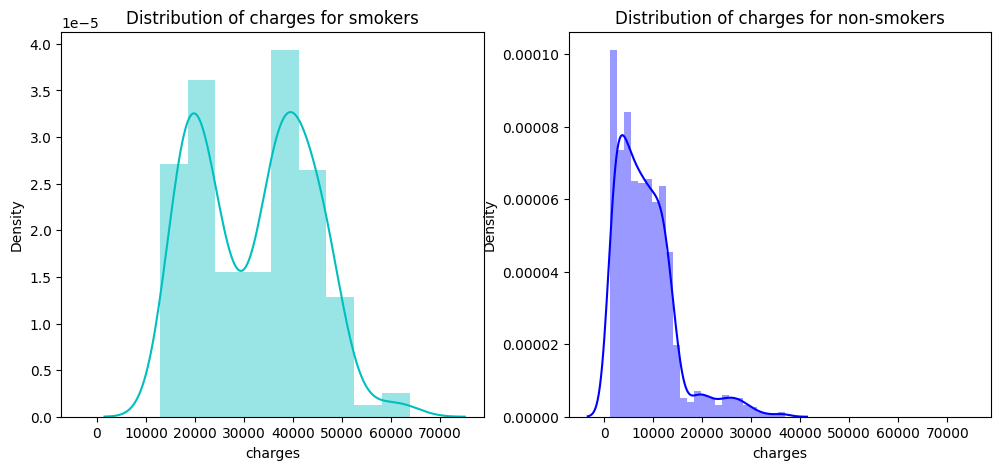

In [ ]:
# Alternative using seaborn

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122, sharex = ax)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

## **2.4 Select features and target**


1.   Prepare X, y
2.   Prepare X_train, X_test, y_train, y_test (hint: using `train_test_split')



In [ ]:
X = df.drop(['charges'], axis = 1)
y = df.charges



## **2.5 Split data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)